In [107]:
import pandas as pd
import numpy as np
import random
import math
from tqdm import tqdm

In [108]:
data = pd.read_csv('../data/iono/ionosphere.csv')
feature_columns = [ col for col in data.columns if col not in ['id','target','f2','f3']]
for col in feature_columns:
        data[col] = pd.qcut(data[col], q=2, labels=False, duplicates='drop')
feature_columns = [ col for col in data.columns if col not in ['id','target']]
print(data[feature_columns].nunique())

f2     2
f3     1
f4     2
f5     2
f6     2
f7     2
f8     2
f9     2
f10    2
f11    2
f12    2
f13    2
f14    2
f15    2
f16    2
f17    2
f18    2
f19    2
f20    2
f21    2
f22    2
f23    2
f24    2
f25    2
f26    2
f27    2
f28    2
f29    2
f30    2
f31    2
f32    2
f33    2
f34    2
f35    2
dtype: int64


In [109]:
print(feature_columns)

['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35']


In [110]:
def calculate_equivalence_classes(data, condition_attrs):
    # 取出条件属性的列索引
    # 设置条件属性为索引
    # print(condition_attrs)
    data_indexed = data.set_index(condition_attrs)
    # 按照索引分组并将分组内结果合并为列表
    equivalence_classes = data_indexed.groupby(level=condition_attrs)[data.columns[0]].apply(list).to_dict()
    return equivalence_classes

In [111]:
def fitness_function(feature_columns,data,decision_attr):
    # 计算D的信息熵
    total_records = len(data)
    decision_counts = data[decision_attr].value_counts()
    decision_prob = decision_counts / total_records
    entropy_D = -(decision_prob * np.log2(decision_prob)).sum()

    equivalence_classes = calculate_equivalence_classes(data,feature_columns)
    equivalence_classes_dec = calculate_equivalence_classes(data, decision_attr)

    rule_confidences =0
    entropy_DB = 0
    count=0

    for equivalence_class in equivalence_classes.values():
           class_size = len(equivalence_class)
           max=0
           for key_decision in equivalence_classes_dec.keys():
               x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
               if len(x) / class_size >max:
                   max=len(x)/class_size
                   if max==0.5:
                       print(max)
           y=1-max
           rule_confidences=rule_confidences+y
           count=count+1

    for equivalence_class in equivalence_classes.values():
        class_size = len(equivalence_class)
        class_prob = class_size / total_records
        for key_decision in equivalence_classes_dec.keys():
            x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
            if (len(x)>0):
                decision_prob = len(x) / class_size
                entropy_DB -= class_prob * decision_prob * math.log(decision_prob, 2)
    print(entropy_D-entropy_DB)
    avg_confidence = rule_confidences/ count+0*(entropy_D-entropy_DB)
    return avg_confidence

In [112]:
feature_columns1=['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31']
feature_columns2=['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27','f28']
feature_columns3=['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23','f24', 'f25']
feature_columns4=['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19','f20', 'f21', 'f22']
feature_columns5=['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19']
feature_columns6=['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16']
feature_columns7=['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13']
feature_columns8=['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9','f10']
feature_columns9=['f2', 'f3', 'f4', 'f5', 'f6', 'f7']
feature_columns10=['f2', 'f3', 'f4']

print(fitness_function(feature_columns10,data,'target'))

0.24517921414906818
0.14126173948550427


In [115]:
a=[0. , 0.1 ,0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8, 0.9 ,1. ]
b=[]
x=0.14126173948550427
y=0.24517921414906818
for i in a:
    b.append(x + i * y)
print(b)

[0.14126173948550427, 0.1657796609004111, 0.1902975823153179, 0.21481550373022473, 0.23933342514513156, 0.2638513465600384, 0.28836926797494516, 0.312887189389852, 0.3374051108047588, 0.36192303221966565, 0.3864409536345724]


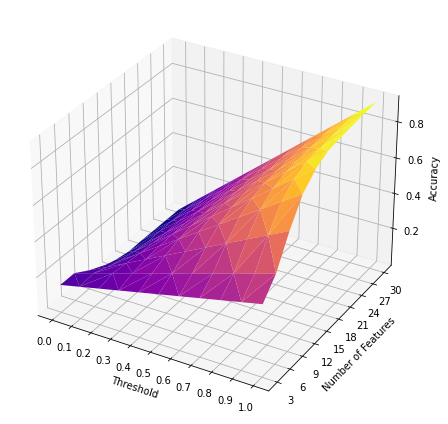

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y = [3,6,9,12,15,18,21,24,27,30]
X, Y = np.meshgrid(x, y)
data=np.array([
    [0.14126173948550427, 0.1657796609004111, 0.1902975823153179, 0.21481550373022473, 0.23933342514513156, 0.2638513465600384, 0.28836926797494516, 0.312887189389852, 0.3374051108047588, 0.36192303221966565, 0.3864409536345724],
    [0.1415053265470738, 0.175716803703658, 0.20992828086024223, 0.2441397580168264, 0.27835123517341065, 0.3125627123299949, 0.34677418948657907, 0.38098566664316325, 0.4151971437997475, 0.4494086209563317, 0.48362009811291595],
    [0.09002759724409207, 0.14571379423442107, 0.20139999122475005, 0.25708618821507906, 0.31277238520540807, 0.368458582195737, 0.4241447791860661, 0.47983097617639503, 0.5355171731667241, 0.591203370157053, 0.646889567147382],
    [0.0466840522262209, 0.12003817184052082, 0.19339229145482076, 0.2667464110691206, 0.3401005306834206, 0.4134546502977205, 0.4868087699120204, 0.5601628895263202, 0.6335170091406203, 0.7068711287549201, 0.78022524836922],
    [0.021808872559025656, 0.10477490114496592, 0.1877409297309062, 0.2707069583168464, 0.3536729869027867, 0.4366390154887269, 0.5196050440746671, 0.6025710726606074, 0.6855371012465478, 0.7685031298324879, 0.8514691584184282],
    [0.005820105820105821, 0.09433129209063783, 0.18284247836116982, 0.27135366463170185, 0.35986485090223386, 0.44837603717276586, 0.5368872234432979, 0.6253984097138299, 0.7139095959843619, 0.8024207822548939, 0.8909319685254259],
       [0.007317493112947658, 0.09672270127597103, 0.1861279094389944, 0.27553311760201776, 0.36493832576504115, 0.4543435339280645, 0.5437487420910878, 0.6331539502541111, 0.7225591584171346, 0.8119643665801579, 0.9013695747431812],
       [0.005564182194616977, 0.0959615780533848, 0.18635897391215264, 0.2767563697709204, 0.36715376562968827, 0.45755116148845604, 0.5479485573472238, 0.6383459532059916, 0.7287433490647596, 0.8191407449235273, 0.9095381407822951],
       [0.005269186712485681, 0.09649918328384685, 0.18772917985520804, 0.27895917642656914, 0.37018917299793036, 0.4614191695692915, 0.5526491661406526, 0.6438791627120138, 0.7351091592833751, 0.8263391558547363, 0.9175691524260974],
       [0.0035519125683060116, 0.09545556383385531, 0.1873592150994046, 0.27926286636495384, 0.3711665176305032, 0.46307016889605246, 0.5549738201616017, 0.646877471427151, 0.7387811226927004, 0.8306847739582497, 0.9225884252237989]
])

fig = plt.figure(figsize=(6,6))  # Set the size of the figure in inches
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), data.flatten(), cmap='plasma')

# Set the axis labels
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of Features')
ax.set_zlabel('Accuracy')

# Customize the tick labels
x_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_ticks = [3,6,9,12,15,18,21,24,27,30]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Save the plot in IEEE format
plt.tight_layout()
plt.savefig('test2.png', bbox_inches='tight',dpi=300)

# Show the plot in the console
plt.show()